<a href="https://colab.research.google.com/github/Lama-Aldhafeeri/CAMelBERT/blob/main/Testing_CAMeL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Install camel-tools and sklearn for evaluation
%pip install camel-tools scikit-learn

# Import necessary libraries
from google.colab import drive
import os
import pandas as pd
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Mount Google Drive
drive.mount('/gdrive')
os.environ['CAMELTOOLS_DATA'] = '/gdrive/MyDrive/camel_tools'

# Import CAMeL Tools sentiment analyzer
from camel_tools.sentiment import SentimentAnalyzer

# Read the CSV file from Google Drive
file_path = '/gdrive/MyDrive/three_labeld_data_with_headers.csv'
df = pd.read_csv(file_path)

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [ ]:
# Display sample of the dataset
df.sample(n=5)

,Post,Polarity
21635,الهلال_هجر مبروك للزعيم,Pos
11037,تعليق_الدراسه_في_القصيم جامعه_القصيم حساب وزي...,Neut
55130,كل ما اجي احاول دحين يطلع اتصل احد الفروع عشا...,Neg
5446,تعليق_الدراسه_في_القصيم انا راضيه ان اكون جام...,Neg
748,الله يكتب لنا الخير والصلاح ويوفق حكومتنا ويسد...,Pos


In [ ]:
#Count the dataset
df.count()

,0
Post,56662
Polarity,56662


In [ ]:
# Read 14% random sample for the Posts and true labels then mapping the labels based on the output format of CAMeL Tools and truth format
df_sampled = df.sample(frac=0.14, random_state=42)

sentences = df_sampled['Post'].tolist()

df_sampled['Polarity'] = df_sampled['Polarity'].map({'Neg':'negative', 'Pos': 'positive', 'Neut': 'neutral'})
true_labels = df_sampled['Polarity'].tolist()  # The truth labels

df_sampled.count()

,0
Post,7933
Polarity,7933


In [ ]:
df_sampled['Polarity'].value_counts()

,count
Polarity,
negative,2931
neutral,2581
positive,2421


In [ ]:
# Load the pretrained Sentiment Analyzer model
sa = SentimentAnalyzer.pretrained()

# Predict sentiment for each sentence
predicted_labels = sa.predict(sentences)

# Calculate Accuracy
accuracy = accuracy_score(true_labels, predicted_labels)

# Print Accuracy
print(f'Accuracy: {accuracy:.4f}')

# Generate a Classification Report (Precision, Recall, F1-Score)
print("Classification Report:")
print(classification_report(true_labels, predicted_labels))

Accuracy: 0.6237
Classification Report:
              precision    recall  f1-score   support

    negative       0.54      0.55      0.54      2931
     neutral       0.52      0.57      0.54      2581
    positive       0.90      0.77      0.83      2421

    accuracy                           0.62      7933
   macro avg       0.65      0.63      0.64      7933
weighted avg       0.64      0.62      0.63      7933



Confusion Matrix:
[[1617 1240   74]
 [ 970 1471  140]
 [ 428  133 1860]]


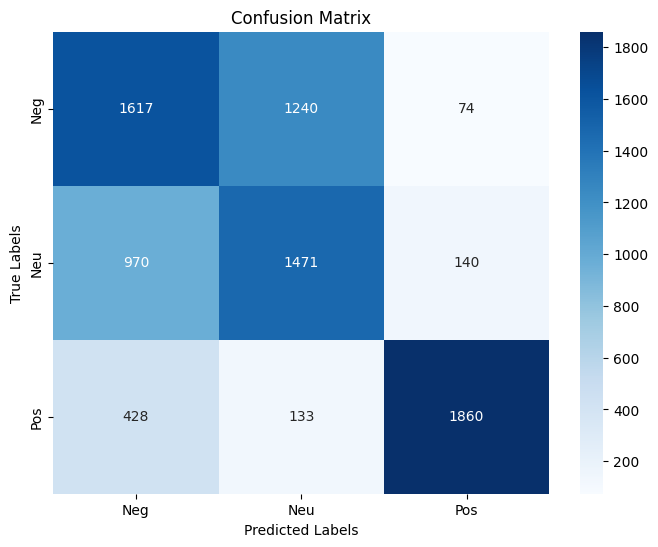

In [ ]:
# Define the label names for the classes (e.g., 0: Negative, 1: Neutral, 2: Positive)
label_names = ['Neg', 'Neu', 'Pos']

# Generate the confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Print the confusion matrix
print("Confusion Matrix:")
print(cm)

# Plot the confusion matrix using a heatmap, with label names on axes
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_names, yticklabels=label_names)

# Add labels and title
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

# Show the plot
plt.show()